In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# define a function for our interval velocity 

In [2]:
def interval_velocity_analytic(time, initial_velocity, amplitude, omega): 
    """
    interval velocity that is a harmonic function
    """
    return initial_velocity + amplitude * np.sin(omega * time)

In [3]:
a = 50
v0 = 2000
freq = 2
omega = 2 * np.pi * freq

In [4]:
n_times = 200 
tmax = 2
time = np.linspace(0, tmax, n_times)

In [5]:
vint = interval_velocity_analytic(time, v0, a, omega)

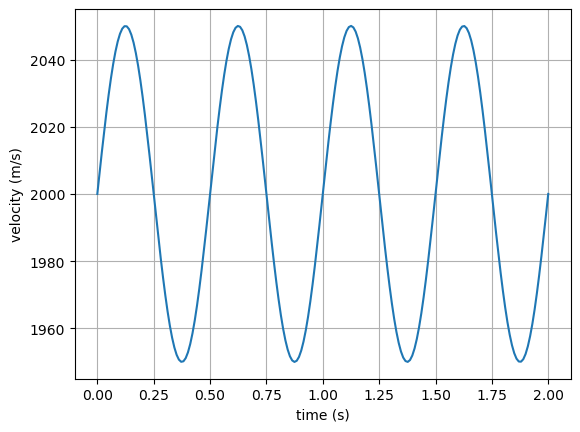

In [6]:
fig, ax = plt.subplots(1, 1) 

ax.plot(time, vint)
ax.set_xlabel("time (s)")
ax.set_ylabel("velocity (m/s)")
ax.grid()

# program up the rms velocity 

- remember to add the 1/t in front of this!
- and -- take the square root

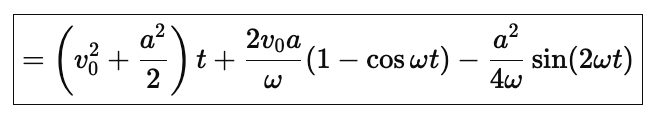

In [7]:
def rms_velocity(time, initial_velocity, amplitude, omega): 

    # initalize a vrms array that is the same length as time
    vrms = np.zeros(len(time))   # np.zeros_like
    
    tinds_nonzero = time > 0 

    # treat the nonzero part 
    term1 = (initial_velocity**2 + amplitude**2/2) * time[tinds_nonzero]
    term2 = (
        2*initial_velocity*amplitude/omega * 
        (1 - np.cos(omega*time[tinds_nonzero]))
    )
    term3 = amplitude**2/(4*omega) * np.sin(2*omega*time[tinds_nonzero])

    vrms2 = 1/time[tinds_nonzero] * (term1 + term2 - term3)
    vrms[tinds_nonzero] = np.sqrt(vrms2)
    
    # treat the zero part 
    vrms[~tinds_nonzero] = initial_velocity 
    
    return vrms

In [8]:
vrms = rms_velocity(time, v0, a, omega)

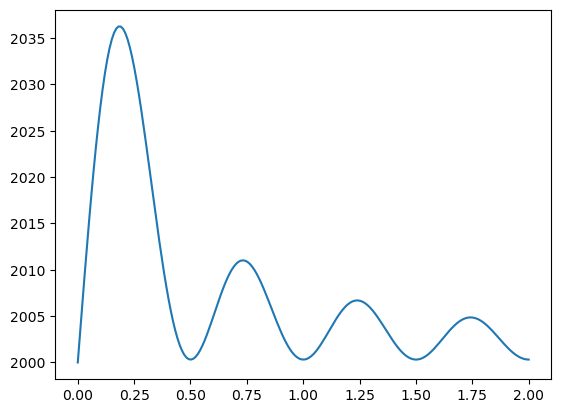

In [9]:
plt.plot(time, vrms)

# estimate interval velocity from rms velocity 

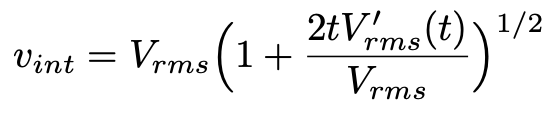

In [10]:
def compute_vint_from_vrms(time, vrms):
    dt = np.diff(time)
    vrms_grad_pos = np.diff(vrms)/dt
    vrms_grad = np.r_[vrms_grad_pos[0]*2, vrms_grad_pos]
    vint_rec = vrms * np.sqrt(1 + 2*time*vrms_grad/vrms)
    return vint_rec

In [11]:
vint_rec = compute_vint_from_vrms(time, vrms)

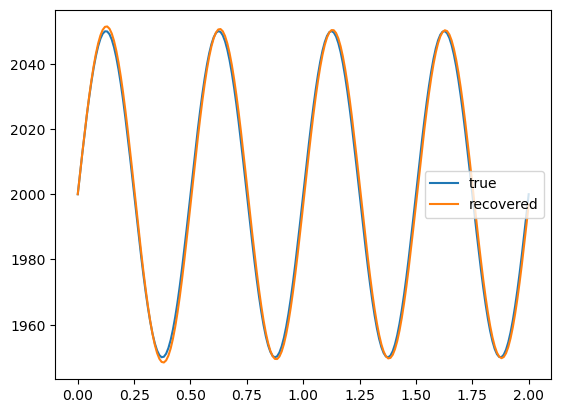

In [12]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_rec, label="recovered")

ax.legend()

# finite amount of data 

In [13]:
decimate = 2

time_obs = time[::decimate]
vrms_obs = vrms[::decimate]

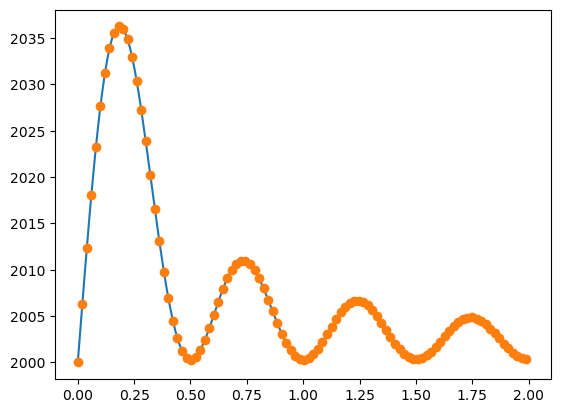

In [14]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="~infinite data")
ax.plot(time_obs, vrms_obs, "o", label="finite data") 